In [2]:
import pandas as pd
import numpy as np

In [38]:
def proecss(filename):
    N_280 = pd.read_excel('6a80b280_' + filename + '.xlsx')[['time', 'Q']]
    N_6050 = pd.read_excel('6a806050_' + filename+'.xlsx')

    N_280['time'] = pd.to_datetime(N_280['time'])
    N_6050['time'] = pd.to_datetime(N_6050['time'])

    #280
    bins = pd.date_range(start=N_280['time'][0], end=N_280['time'].dt.ceil('min')[N_280.shape[0] - 1], freq='10S')
    labels = [i for i in range(len(bins) - 1)]
    N_280['time_group'] = pd.cut(N_280['time'], bins=bins, right=False, labels=labels)
    #6050_1
    bins = pd.date_range(start=N_6050['time'][0] , end=N_6050['time'].dt.ceil('min')[N_6050.shape[0] - 1], freq='10S')
    labels = [i for i in range(len(bins) - 1)]
    N_6050['time_group'] = pd.cut(N_6050['time'], bins=bins, right=False, labels=labels)
    #分组
    N280 = pd.DataFrame.groupby(N_280, by=['time_group'])
    N6050 = pd.DataFrame.groupby(N_6050, by=['time_group'])
    print(len(N280), len(N6050))
    assert len(N280) == len(N6050)

    data = []
    label = []
    for i in range(0, len(N280)):
        data.append( pd.concat([N6050.get_group(i).drop(columns=['time']).reset_index(drop=True), 
            N280.get_group(i).drop(columns=['time']).reset_index(drop=True)], axis=1))
        label.append(i % 6)
    data = [d[['X', 'Y', 'Z', 'RX', 'RY', 'RZ', 'Q']] for d in data]
    data = [d.dropna(axis=0) for d in data]
    
    Bigdata = np.full((len(data), 500, 7), np.nan)
    for i in range(len(data)):
        length = data[i].shape[0]
        Bigdata[i,0:length,:] = data[i].values
    Bigdata = Bigdata.astype(np.float32)
    label = np.array(label).astype(np.int32)
    return Bigdata, label

In [51]:
X ,y = proecss('4')

162 162


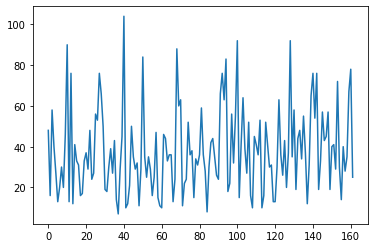

In [52]:
import matplotlib.pyplot as plt
num = np.isnan(X).all(axis=2).astype(np.int32).sum(axis=1)
plt.plot(range(162), num)

In [53]:
np.savez('4.npz',X =X, y= y)

In [54]:
np.unique(y, return_counts=True)


(array([0, 1, 2, 3, 4, 5]), array([27, 27, 27, 27, 27, 27], dtype=int64))

In [3]:
#合并
files = ['1.npz', '2.npz', '3.npz', '4.npz', 'purefall.npz']
X = np.concatenate([np.load(file)['X'] for file in files], axis=0)
y = np.concatenate([np.load(file)['y'] for file in files], axis=0)

In [8]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 45,  45,  45,  45,  45, 227], dtype=int64))

In [56]:
np.savez('nn.npz', X=X, y =y)

In [9]:
X_0 = np.compress(y == 0, X, axis=0)[0:45]
X_1 = np.compress(y == 1, X, axis=0)[0:45]
X_2 = np.compress(y == 2, X, axis=0)[0:45]
X_3 = np.compress(y == 3, X, axis=0)[0:45]
X_4 = np.compress(y == 4, X, axis=0)[0:45]
X_5 = np.compress(y == 5, X, axis=0)

In [10]:
y_0 = np.full((45,), fill_value=0)
y_1 = np.full((45,), fill_value=1)
y_2 = np.full((45,), fill_value=2)
y_3 = np.full((45,), fill_value=3)
y_4 = np.full((45,), fill_value=4)
y_5 = np.full((227,), fill_value=5)

In [11]:
X = np.concatenate([X_0, X_1, X_2, X_3, X_4, X_5], axis=0)
y = np.concatenate([y_0, y_1, y_2, y_3, y_4,y_5], axis=0)

In [12]:
X.shape, y.shape

((452, 500, 7), (452,))

ValueError: x and y must have same first dimension, but have shapes (457,) and (452,)

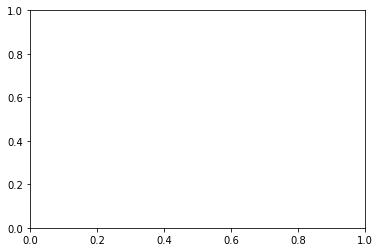

In [13]:
import matplotlib.pyplot as plt
num = np.isnan(X).all(axis=2).astype(np.int32).sum(axis=1)
plt.plot(range(452,), num)

In [14]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 45,  45,  45,  45,  45, 227], dtype=int64))

In [15]:
np.savez('nn.npz', X =X ,y=y)